# Pre-amble: various functions useful for generating slides

#### For convenience, put `slides.html` generating code at the top:

In [20]:
!jupyter nbconvert --to slides slides.ipynb && mv slides.slides.html slides.html

[NbConvertApp] Converting notebook slides.ipynb to slides
[NbConvertApp] Writing 4335438 bytes to slides.slides.html


Imports:

In [2]:
import json
import sys

from IPython.display import display, Image, Markdown
import pytest
from pyteal import *
import qrcode
from typing import Literal

`show` object:

In [3]:
Rng = tuple[int, int]

class CodeDisplayer:
    ERROR_NO_RANGES = """Must provide at least one range - 
Why would you want to display NOTHING AT ALL?"""

    ERROR_RANGE_INDEX = "Range[{}] = {} was invalid because not in {}"
    
    def __init__(self):
        self.md: str = ""
    
    def validate(self, lines: list[str], *ranges: Rng) -> None:
        assert ranges, self.ERROR_NO_RANGES
        
        N = len(lines)
        def in_range(lineno):
            return 1 <= lineno <= N
        
        for i, rng in enumerate(ranges):
            assert all(map(in_range, rng)), self.ERROR_RANGE_INDEX.format(i, rng, (1,N))
    
    def prepare(self, code: str, *ranges: Rng, segment_buffer: bool = False) -> None:
        """Prepare for displaying code based on Human line numbers"""
        lines = code.splitlines()
        self.validate(lines, *ranges)
        NL = "\n"
        BUFF = NL if segment_buffer else ""
        def segment(r):
            return f"{BUFF}{NL.join(lines[i] for i in r)}{BUFF}"

        body = "\n. . .\n".join(segment(range(first-1, last)) for first, last in ranges)
        self.md = "```\n" + body + "\n```"

    def __call__(self):
        return display(Markdown(self.md))
        
show = CodeDisplayer()

def test_example():
    ae = None
    def aerr(s):
        assert s in str(ae.value)

    show.validate([1, 2, 3], (2,3))
    show.validate([1, 2, 3], (2,3), (1,3))
    show.validate([1, 2, 3], (2,3), (1,1), (1,3))

    with pytest.raises(AssertionError) as ae:
        show.validate([1, 2, 3])
    aerr("NOTHING AT ALL?")

    with pytest.raises(AssertionError) as ae:
        show.validate([1, 2, 3], (2, 4))
    aerr("Range[0] = (2, 4) was invalid because not in (1, 3)")

    with pytest.raises(AssertionError) as ae:
        show.validate([1, 2, 3], (0, 2))
    aerr("Range[0] = (0, 2) was invalid because not in (1, 3)")

    with pytest.raises(AssertionError) as ae:
        show.validate([1, 2, 3], (1,3), (0, 2))
    aerr("Range[1] = (0, 2) was invalid because not in (1, 3)")
    
test_example()

Generate QR-Code's for Demo and Github:

In [4]:
DEMO_URL = "https://jasonpaulos.github.io/decipher-22-pyteal-talk/"
DEMO_QR_CODE = "images/demo-url.png"

GITHUB_URL = "https://www.github.com/jasonpaulos/decipher-22-pyteal-talk"
GITHUB_QR_CODE = "images/github-url.png"

def make_qr_code(url, filename):
    qr = qrcode.QRCode(version=1, box_size=8, border=5)
    qr.add_data(url)
    qr.make(fit=True)
    qr_img = qr.make_image(fill='black', back_color='white')
    qr_img.save(filename)

make_qr_code(DEMO_URL, DEMO_QR_CODE)
make_qr_code(GITHUB_URL, GITHUB_QR_CODE)

`ImageDisplayer` objects:

In [5]:
class ImageDisplayer:    
    def __init__(self, img):
        self.img = img
    
    def __call__(self):
        return display(self.img)

# prep the images
img = Image(filename="images/moe.png", alt="Moe of the 3 Stooges", width="400")
moe = ImageDisplayer(img)

img = Image(filename="images/warning.png", alt="Warning", width="200")
warning = ImageDisplayer(img)

img = Image(filename=DEMO_QR_CODE, alt="Demo URL QR-Code")
demo_qr_code = ImageDisplayer(img)

img = Image(filename=GITHUB_QR_CODE, alt="Talk Github Repo URL QR-Code")
github_qr_code = ImageDisplayer(img)

## New in PyTeal: Boxes and ABI-Compatible Smart Contracts
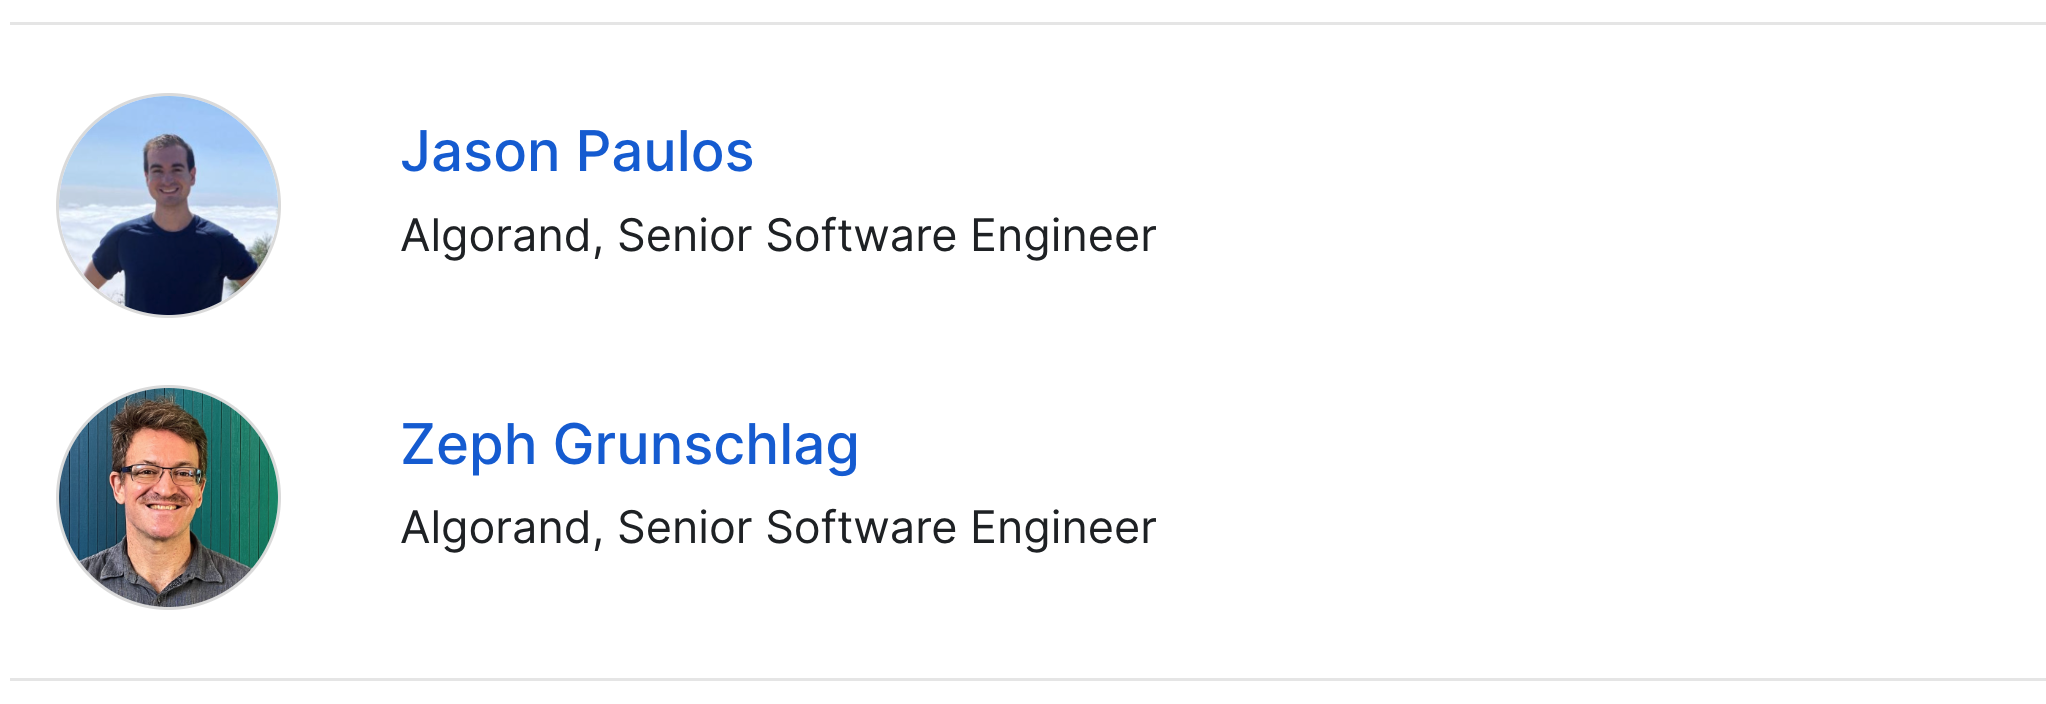
### Learn how to utilize unlimited global storage and ABI-compatibility in PyTeal, Algorand’s library for writing smart contracts in Python.

<!-- Assumed slide numbers
2. PyTeal Intro Slide
8. Boxes Intro Slide
10. Router Intro Slide
15. Demo Slide
-->
<!-- TODO:
QR codes 
-->

## <center>Agenda</center>

### I. <a href="#/2">PyTeal</a>
### II. <a href="#/8">Application Boxes in PyTeal</a>
### III. <a href="#/10">PyTeal's ABI-Router: Building an ARC-4 Application</a>
### IV. <a href="#/15/0/1">Demo</a>
### V. Questions

## <center>References</center>

### Decipher 2021: **Writing Smart Contracts with Python**

### https://www.github.com/jasonpaulos/decipher-22-pyteal-talk

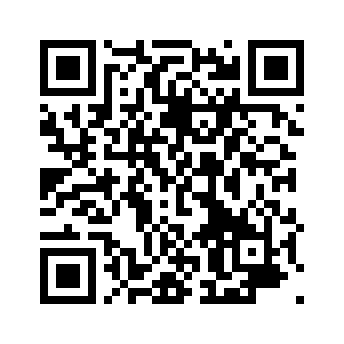

In [6]:
github_qr_code()



<h1 style='color:white'>.</h1>

# <center>PyTeal</center>



<h1 style='color:white'>.</h1>

### <center>Algorand dApp Layers</center>

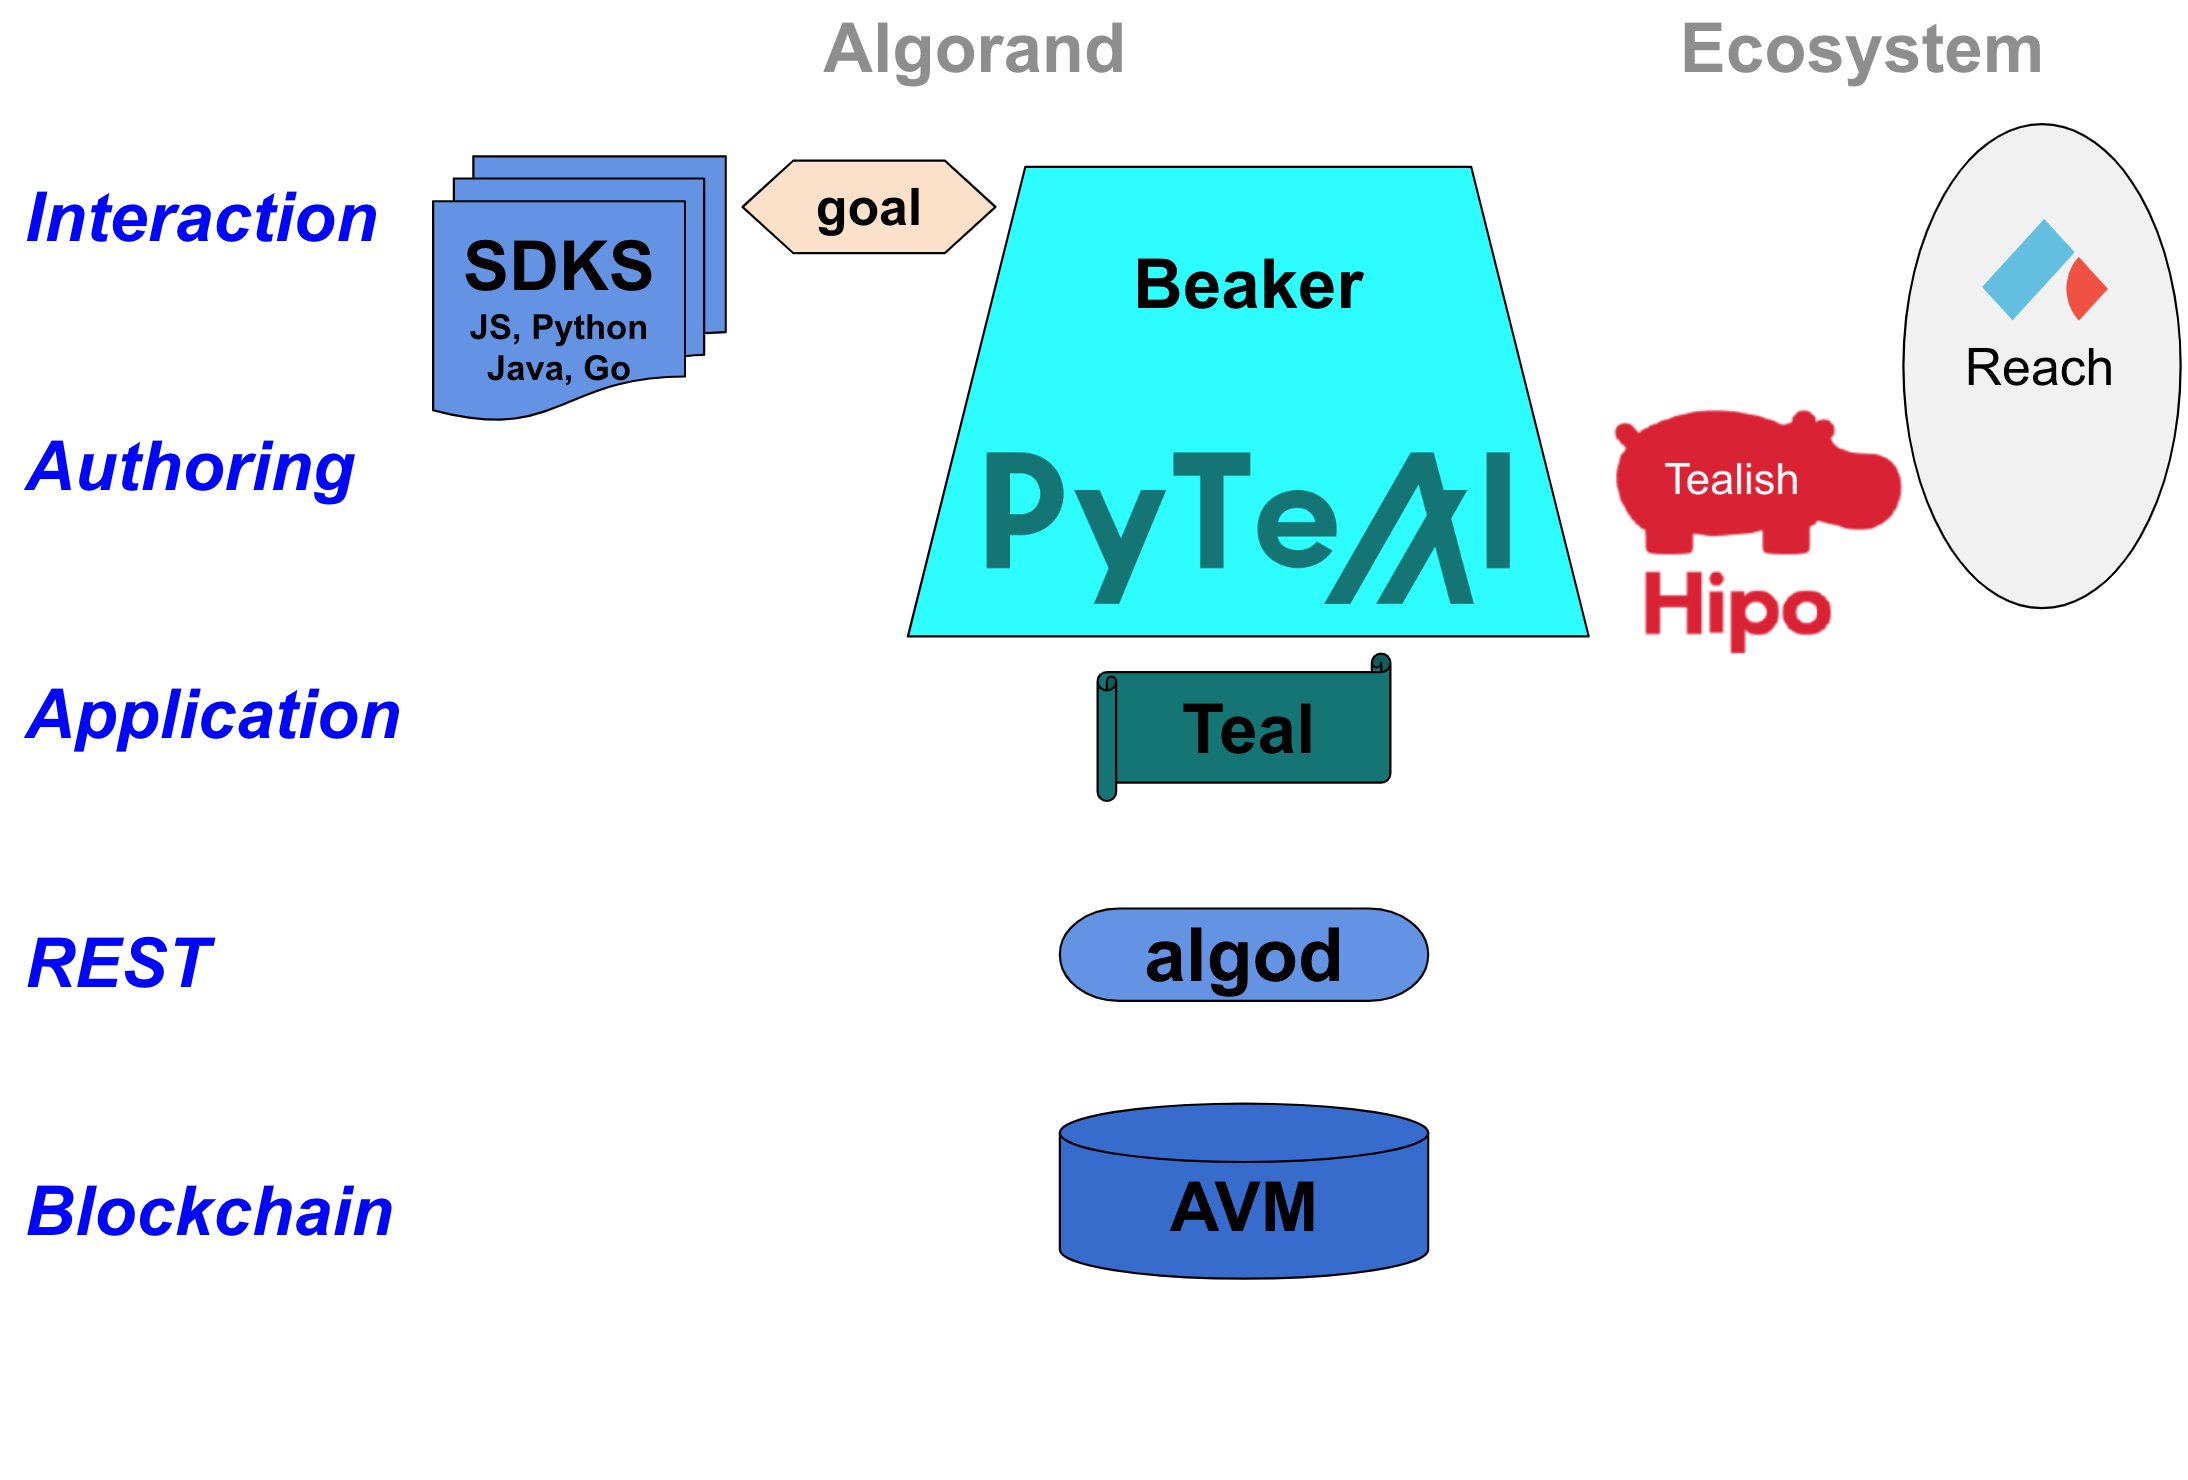



<h1 style='color:white'>.</h1>

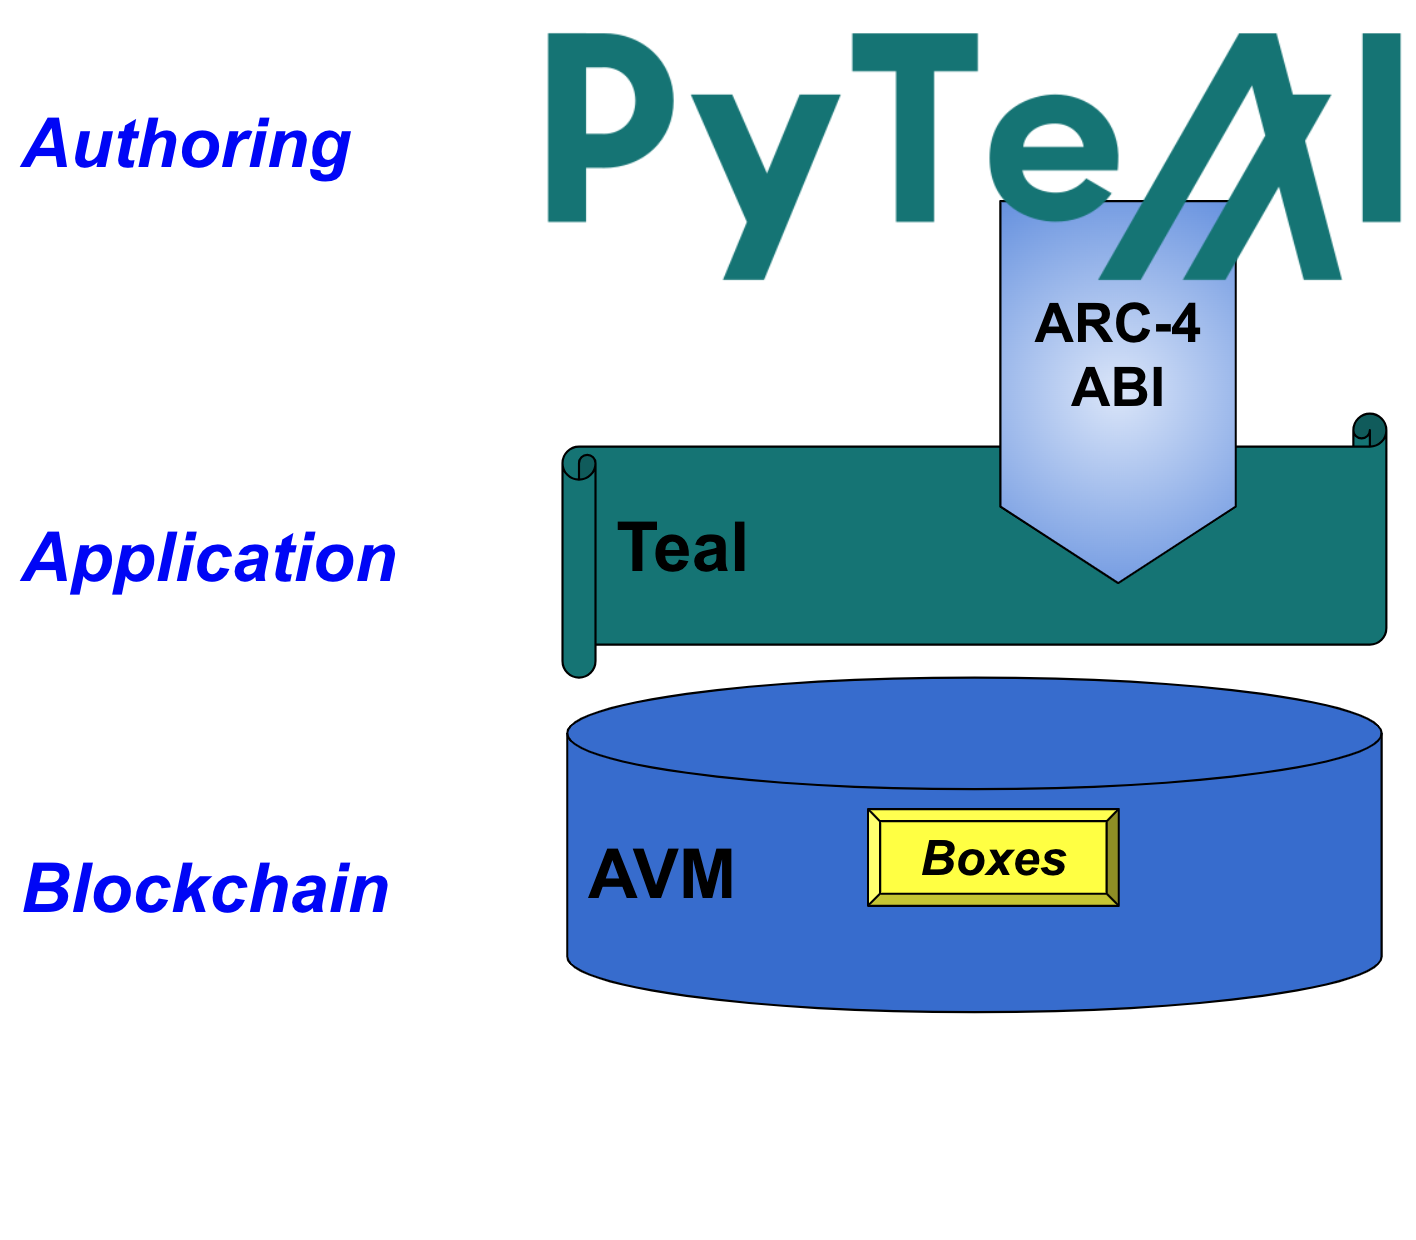



<h1 style='color:white'>.</h1>

# <center>Polling dApp</center>

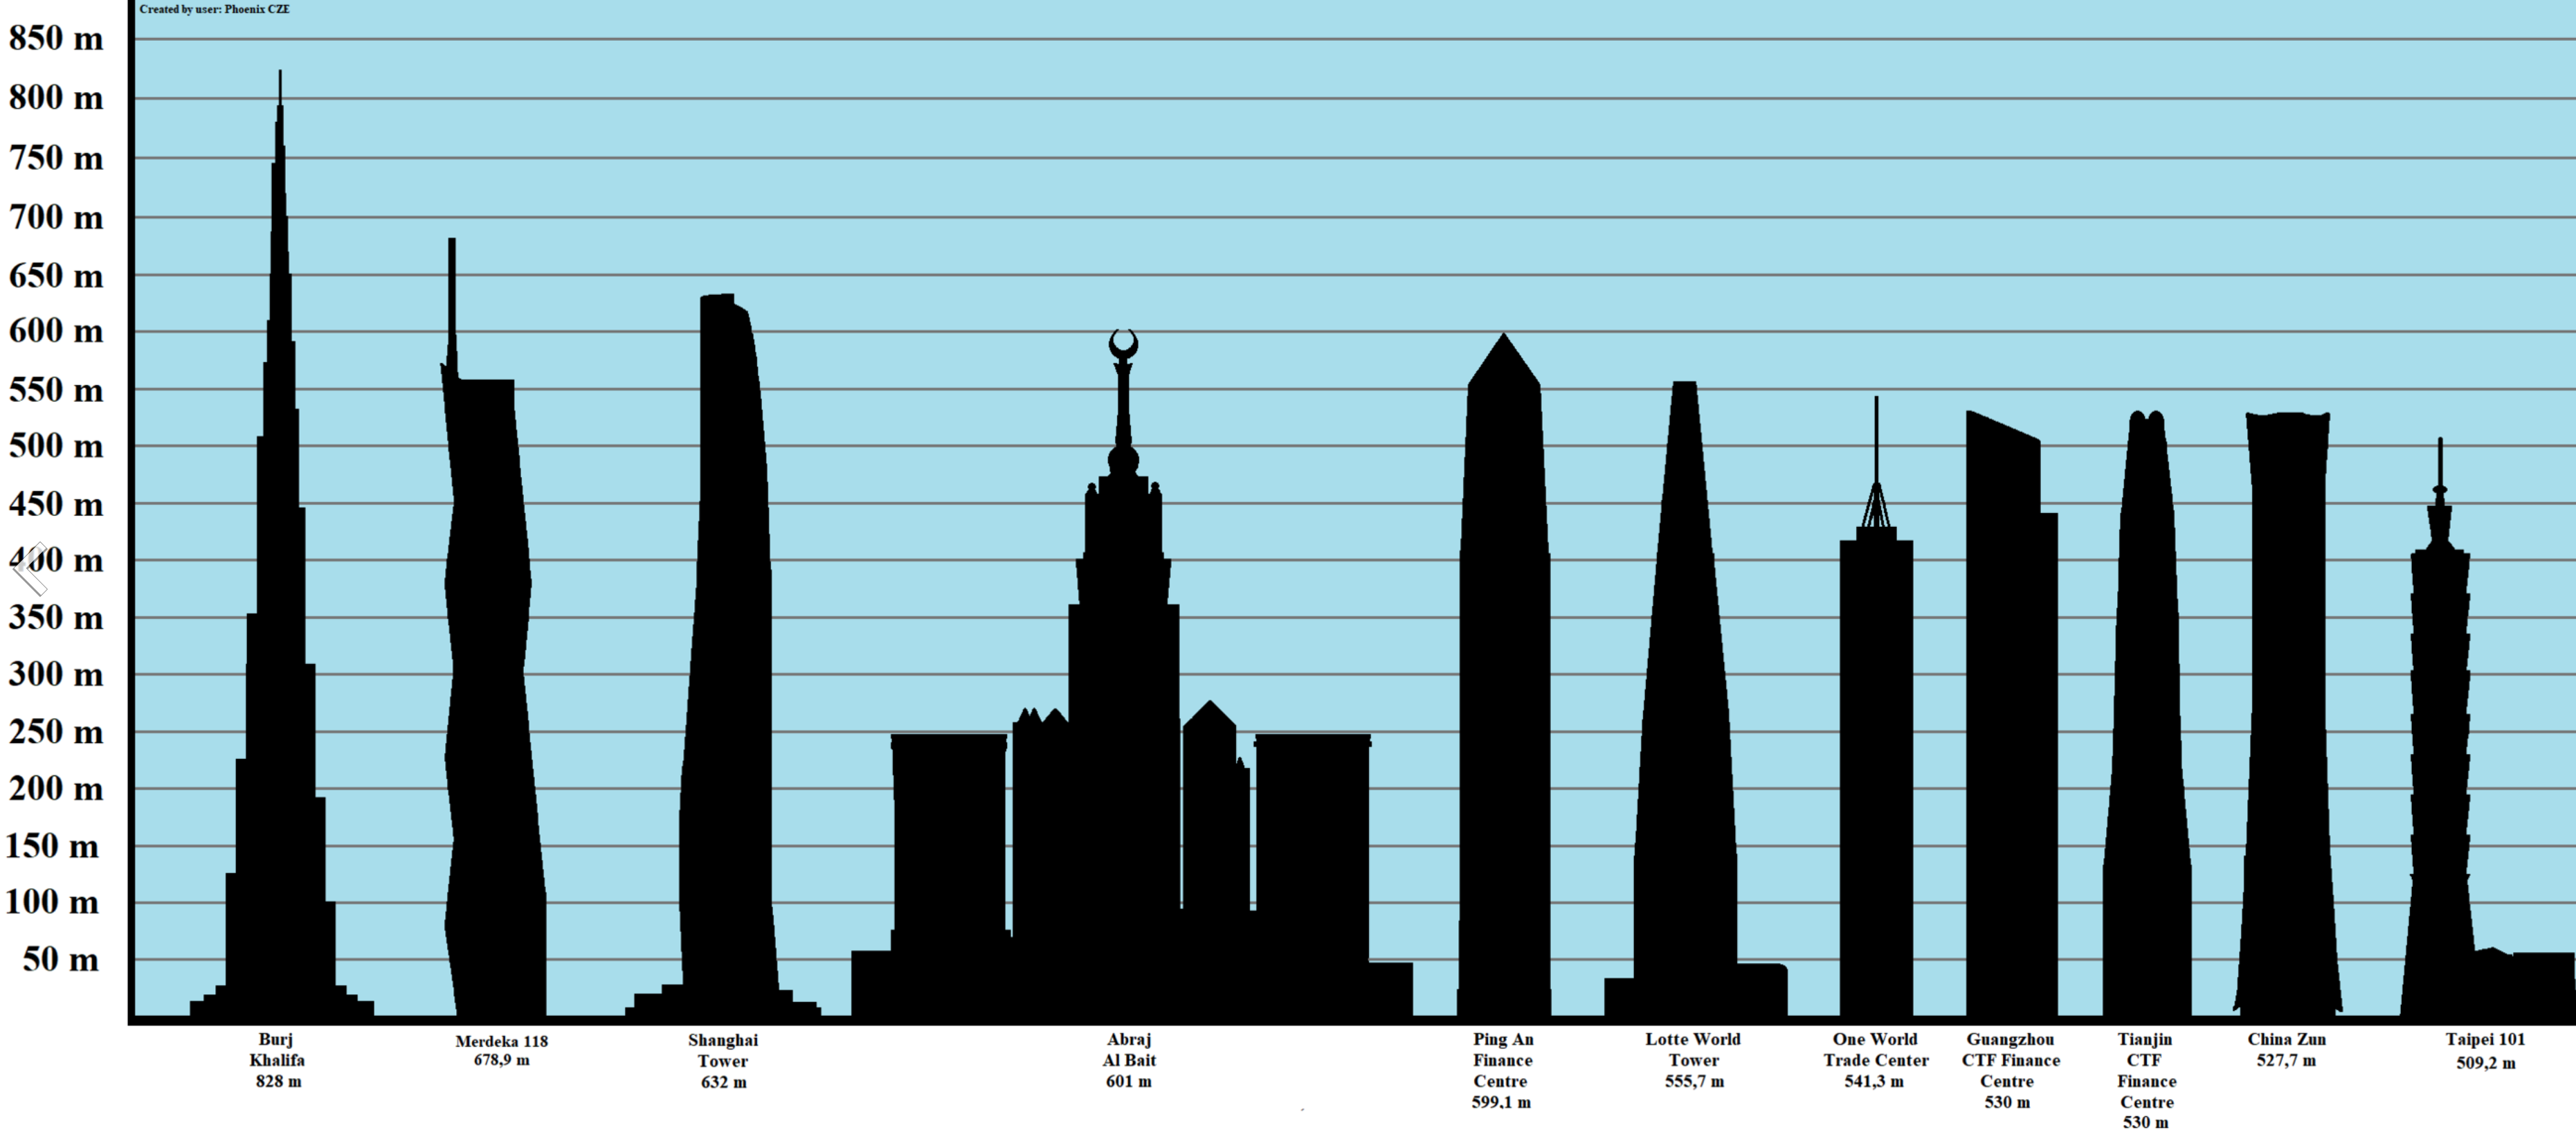

## Favorite Tall Building?

### 1. Empire State - New York
### 2. Burj Khalifa - Dubai
### 3. Abraj Al-Bait - Mecca
### 4. Taipei 101 - Taipei
### 5. Shanghai Tower - Shanghai
### 6. Merdeka 118 - Kuala Lumpur
### 7. Other



<h1 style='color:white'>.</h1>

## <center>Polling dApp</center>

### Poll **administrator** can:

### `create` and `delete` the poll application
### `open` and `close` a poll for voting

### **Anyone** can:

### `submit` a choice  
### get the poll `status`



<h1 style='color:white'>.</h1>

## Example

### `submit` choice **Burj Khalifa - Dubai**

### After 100 submissions
### `status` =
* **11** chose **Empire State - New York**
* **35** chose **Burj Khalifa - Dubai**
* **22** chose **Abraj Al-Bait - Mecca**
* ...



<h1 style='color:white'>.</h1>

### Voting accounts must contribute exactly +1 to tally

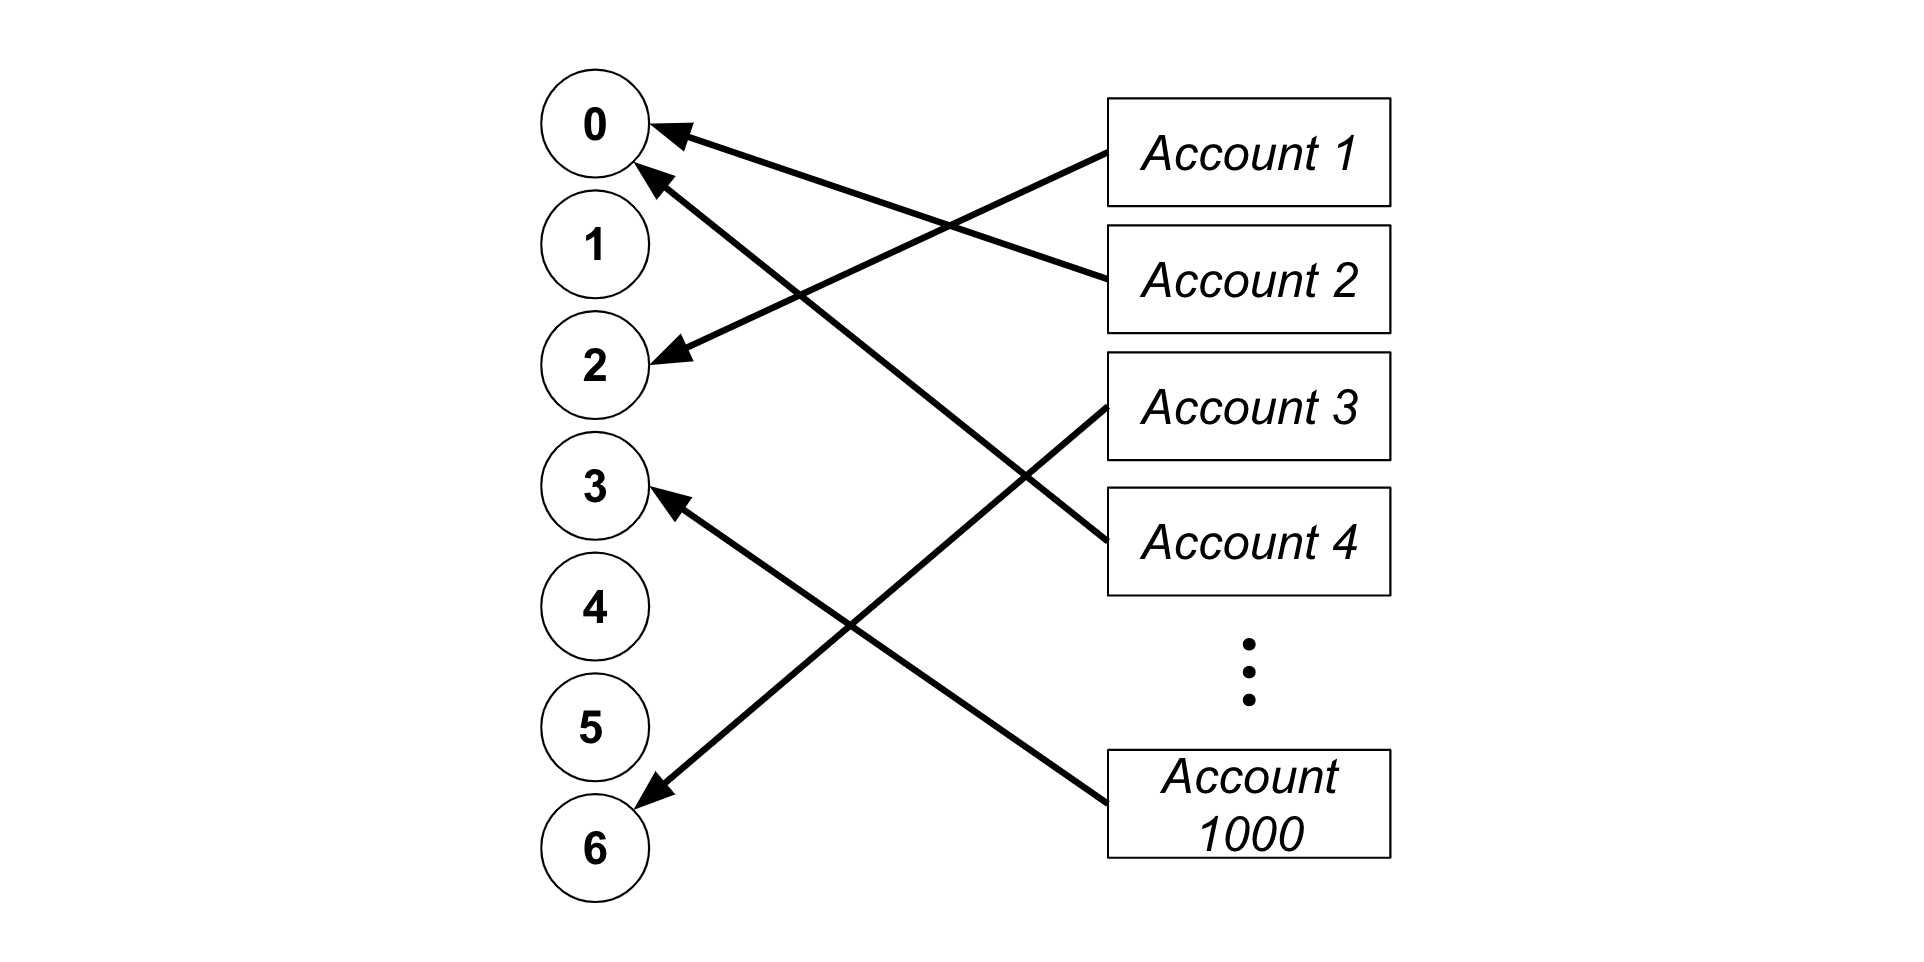



<h1 style='color:white'>.</h1>

### Voting accounts must contribute exactly +1 to tally

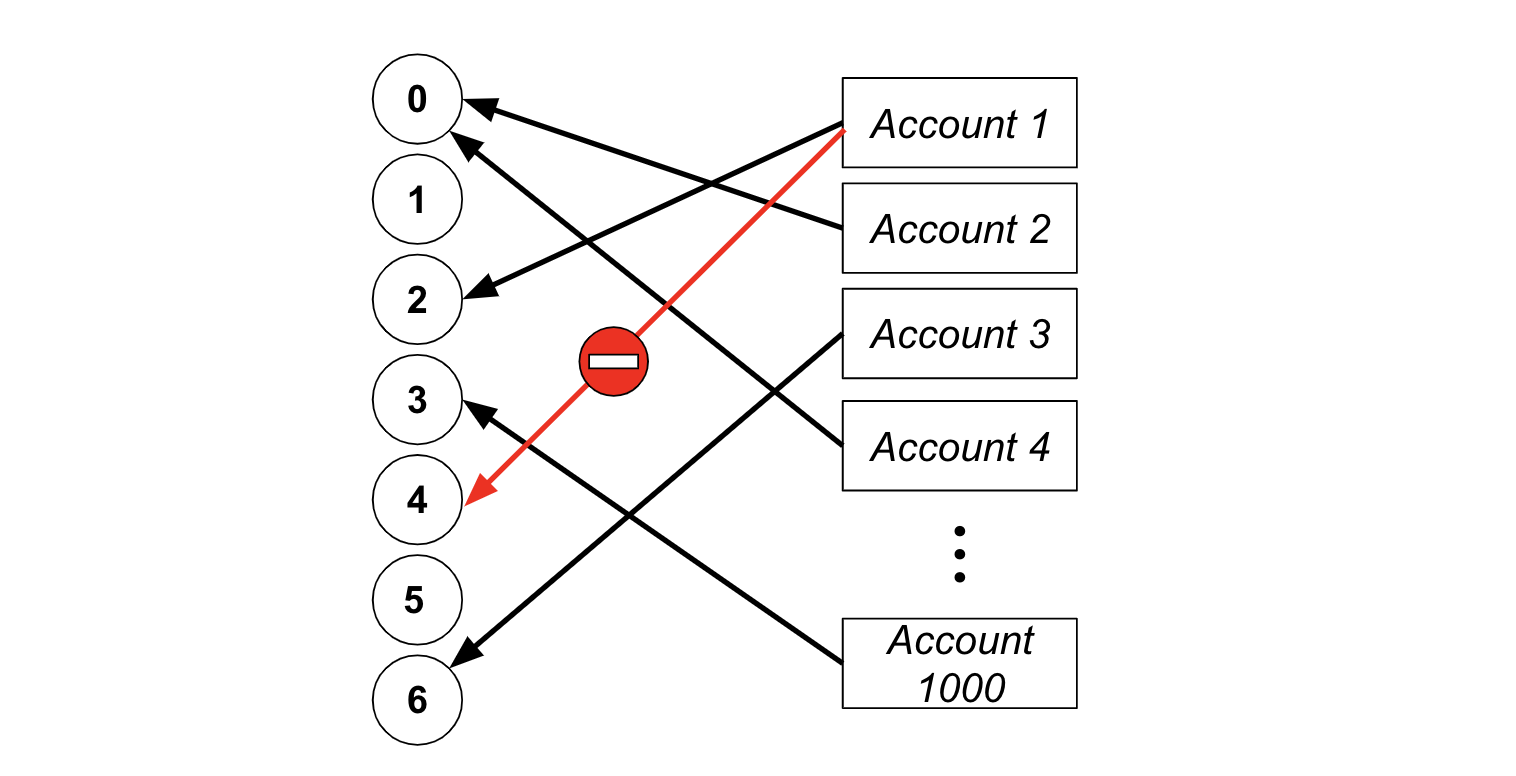



<h1 style='color:white'>.</h1>

### Voting accounts must contribute exactly +1 to tally

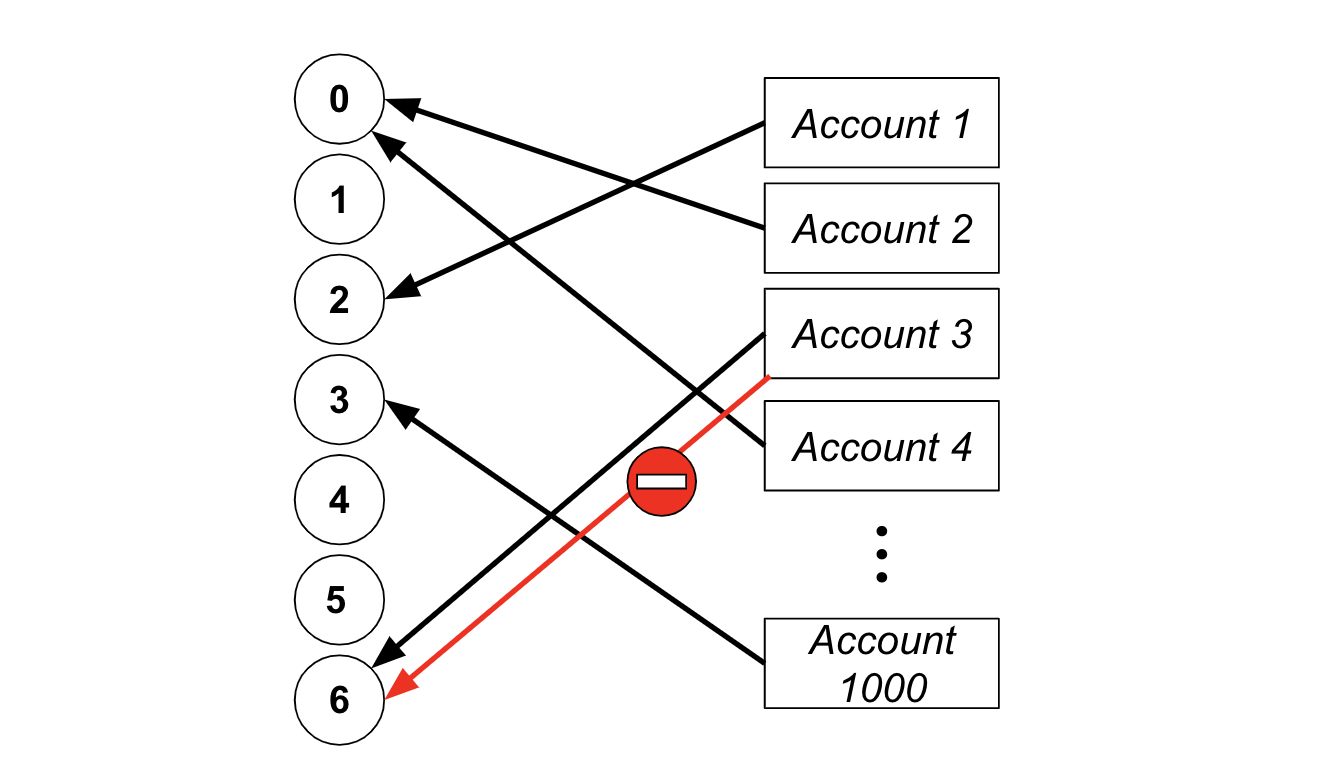



<h1 style='color:white'>.</h1>

NOTES:

* Can't keep all this info in global storage
    * Stats - 8KB total possible. Assuming no compression and 32B per address, 
        that's at most 256 accounts we can keep track of
* Can keep info in local - but then there are some downsides:
    * voters need to opt into poll (MBR issues)
    * need to have policies and code around closing/clearing out
* _TRICKY_ Sybil attack. Why can't some create tons of accounts and vote many times.
    AND it's even easier to pull that off with the reduced MBR requirements
    thanks to boxes...
    * Answer: yes, this isn't meant to be a solution to the general problem of
        governance voting, etc.
    * This is only meant for low-stake polls

### Voting accounts must contribute exactly +1 to tally

### **global storage** solution?

### No. Unlimited voting accounts but 8 KB max 

### **local storage** solution?

### Not really. Want _lightweight_ dApp with no `opt-in`



<h1 style='color:white'>.</h1>

### limits reference

https://github.com/algorand/go-algorand/blob/995ae47e80c50e7632034cac8a70b7d6434d03e3/config/consensus.go#L969-L970

`64 keys X (64 + 64 bytes) == 8,196 bytes`

#### min `MBR = 0.15 Algos` with 1 local
#### complex code/policies for `opt in`, `close out`, `clear state`

## Anything else we could do?

### Introduce voting token
### Yes, BUT requires asset opt-in and aiming for lightweight app

Notes:
* **expensive** 0.1 Algos / acct vs. 0.0157 Algos / acct w/ boxes
* **complicated / error prone**
    * need to keep track of asset id off chain and supply it as a foreign ref, then parse out URL, verify that first 32 bytes are the account, etc...
    * need to group with `Asset Config Txn` which specifies how the URL changes

### <center> SOLUTION via Application Boxes </center>
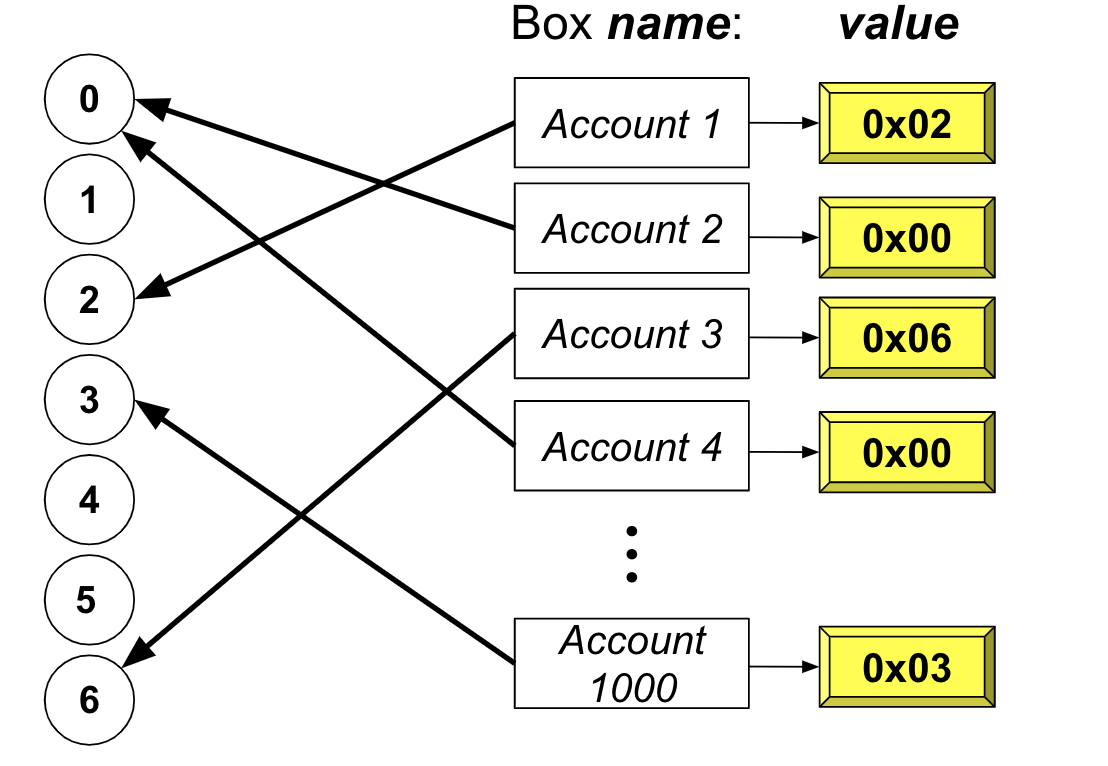

Notes:
* In this solution, only need
    * 32 bytes for the Key (max is 64 bytes)
    * 1 byte for the value (max is 32 **KB**)
* Costs in terms of MBR formula of 2500 + 400*(len(key) + len(value))
    * 15.7 mili-Algo's to store submission info per account
    * Each txn allows up to 8 box references in it with the size of boxes touched totalling at most 1KB * # of refs
    * In our case, this is not an issue. A single box reference -being the submission account- will suffice



<h1 style='color:white'>.</h1>

# <center>Application Boxes in PyTeal</center>



<h1 style='color:white'>.</h1>

Notes
* create: create a box of specified size, with a NoOp if already exists. Returns an indicator for whether box actually got created
* length: when the box exists, gives its value's size. When it doesn't its `hasValue()` will be false
* delete: **don't forget to do this as apps don't clean up their own boxes!!!** Returns indicator for whether box actually got deleted
* replace: ... nothing to add ...
* extract: ... nothing to add ...
* put and get: the workhorses we'll see in action shortly
* put: for setting the entire contents of a box, creating it when it doesn't exist. Returns indicator for whether a box was created during execution
* get: get the entire contents of a box. `hasValue()` will be false if the box doesn't actually exist

### <center>PyTeal `App.box_*()` API</center>

### `App.box_create(name, size)` -  _any_ size ($\leq$ 32KB)
### `App.box_length(name)` - _opcode `box_len`_ 
### `App.box_delete(name)` - _opcode `box_del`_
### `App.box_replace(name, idx, L)` - set part of box
### `App.box_extract(name, idx, L)` - get part of box
### `App.box_put(name, value)` - set value (may create box)
### `App.box_get(name)` - get everything (fail if size > 4KB)



<h1 style='color:white'>.</h1>

### `App.box_get()` and `App.box_put()`

Notes

Inspired by
```python
@router.method
def submit(choice: abi.Uint8) -> Expr:
```

* `sender_box` is a `MaybeValue`:
    * `sender_box.has_value() <--> box exists`
    * `sender_box.value() --> (when box exists) full contents`

In [7]:
from pyteal import Itob, Int, Seq, App, Txn, If
# App.box:    account --> choice
# App.global: choice  --> count

# for real app, choice is passed in as parameter.
choice = Itob(Int(1))  # 1: index of "Burj Khalifa - Dubai"

submit_expr = Seq( # switch vote old_choice ---> choice
  old_choice := App.box_get(Txn.sender()),
  If(old_choice.hasValue()).Then(
    App.globalPut( # App.global[old_choice] -= 1
      old_choice.value(),
      App.globalGet(old_choice.value()) - Int(1),
    ),
  ),
  App.box_put(Txn.sender(), choice),  # App.box[account] <--- choice
  App.globalPut(   # App.global[choice] += 1
    choice, 
    App.globalGet(choice) + Int(1),
  ),
)



<h1 style='color:white'>.</h1>

# PyTeal's ABI-Router: _Building an ARC-4 Application_



<h1 style='color:white'>.</h1>

### `methods` - allow interacting with **Poll App**

### * `create` - called only _during app creation_ and only _by administrator_
### * `open` - called only _by administrator_
### * `close` - called only _by administrator_
### * `submit`
### * `status`

### _(didn't include `delete` for reasons to be explained shortly)_



<h1 style='color:white'>.</h1>

### **Refresher** - `OnComplete` **Actions** for App Transactions

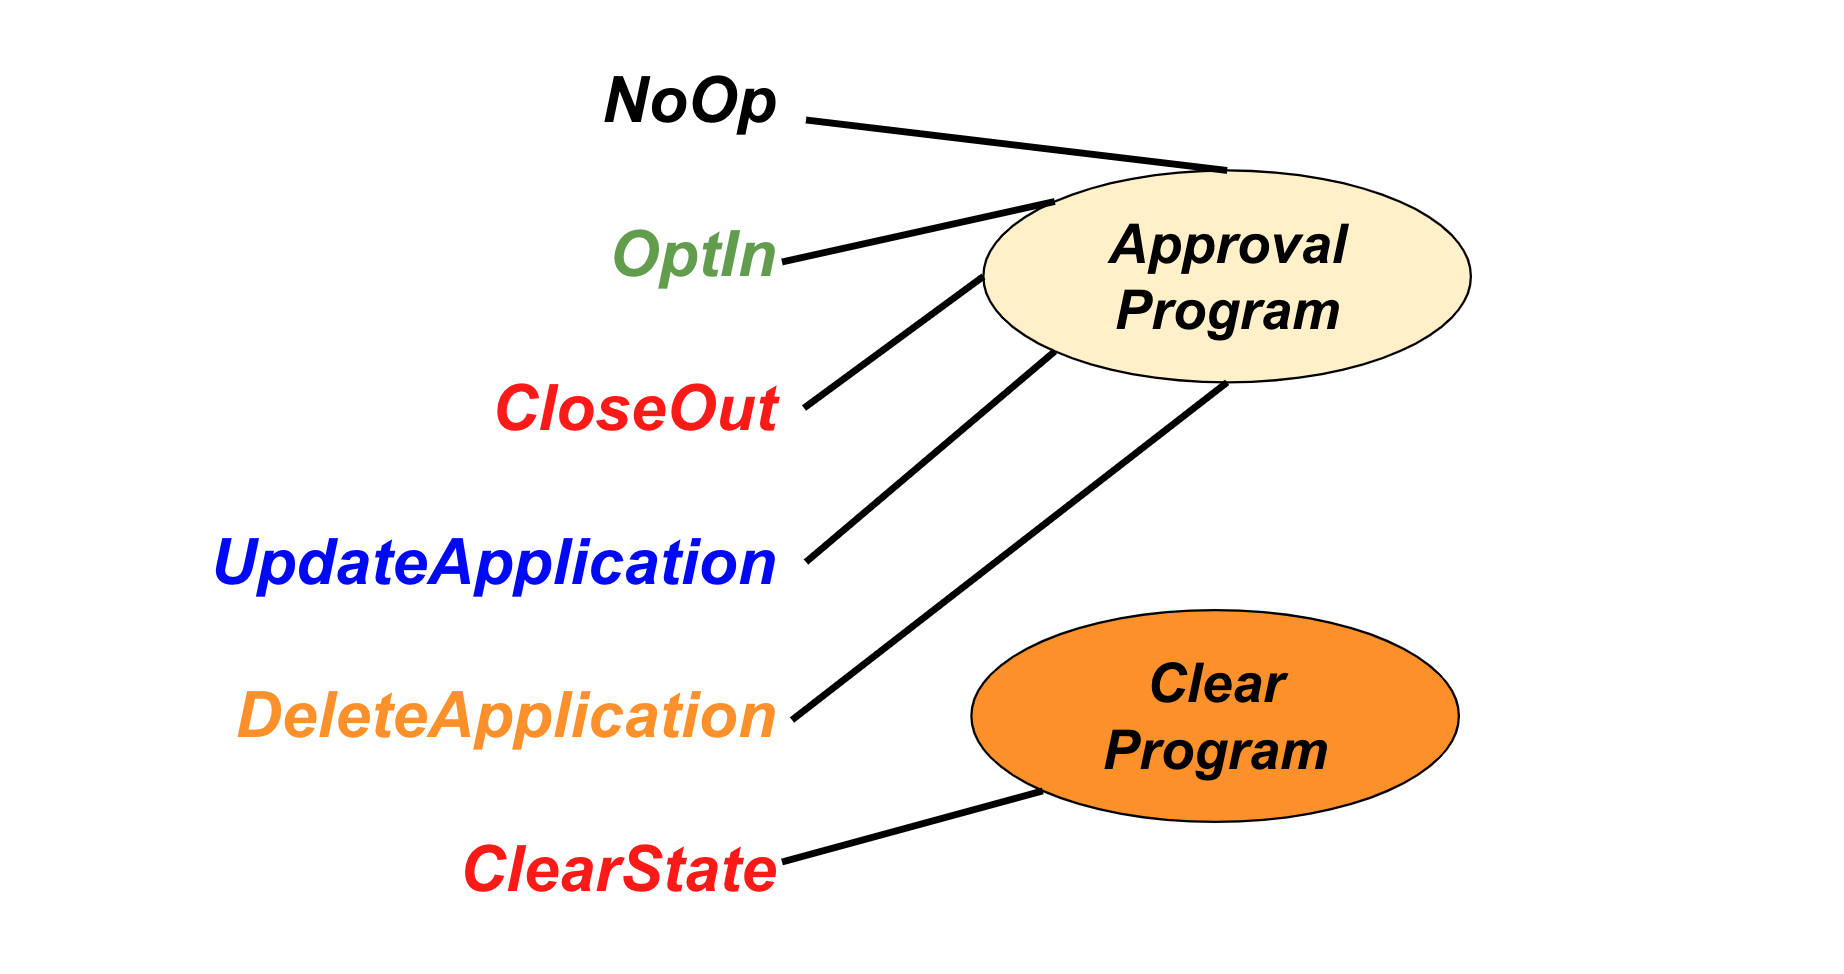



<h1 style='color:white'>.</h1>

<table>
<thead>
<tr>
<th>Value</th>
<th>Name</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>0</td>
<td>NoOp</td>
<td>Execute <code>ApprovalProgram</code> only</td>
</tr>
<tr>
<td>1</td>
<td>OptIn</td>
<td>Allocate local state and execute <code>ApprovalProgram</code></td>
</tr>
<tr>
<td>2</td>
<td>CloseOut</td>
<td>Execute <code>ApprovalProgram</code> and clear local state</td>
</tr>
<tr>
<td>3</td>
<td>ClearState</td>
    <td>Execute <code>ClearStateProgram</code> and clear locals (even if <i>rejects</i>)</td>
</tr>
<tr>
<td>4</td>
<td>UpdateApplication</td>
<td>Execute <code>ApprovalProgram</code> and update programs</td>
</tr>
<tr>
<td>5</td>
<td>DeleteApplication</td>
<td>Execute <code>ApprovalProgram</code> and delete the app</td>
</tr>
</tbody>
</table>

### _ABI_ `method`: code for app transaction with _first argument_ the `selector`

### _ABI_ `bare app call`: app transaction with _no arguments_. Its `action` is the code to be executed

### For Polling dApp:

### `delete` is a **bare app call** for `OnComplete=DeleteApplication`



<h1 style='color:white'>.</h1>

### PyTeal `Router` and its **_M.O.E._** Questions

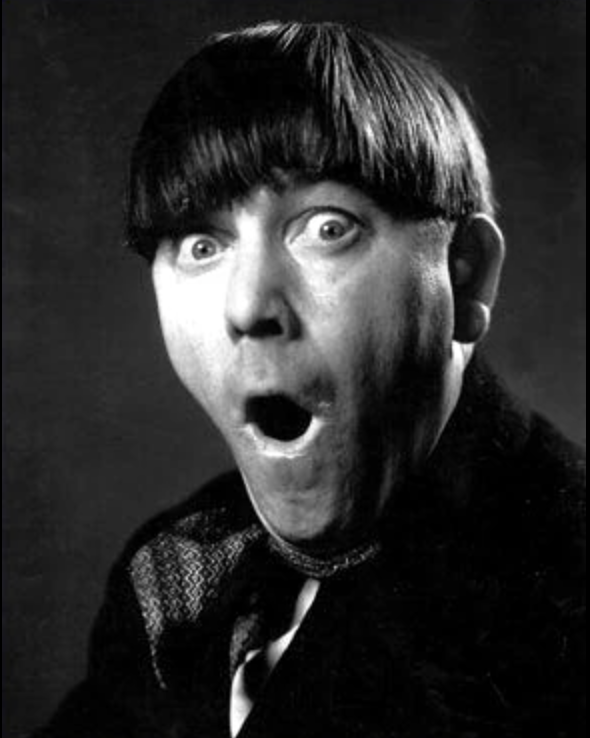

In [8]:
moe()



<h1 style='color:white'>.</h1>

### PyTeal `Router` and its **_M.O.E._** Questions

### The `Router` delegates to appropriate `method` or `bare app call action` based on:

### _[**M**]_  In a `bare app call`? If not, which `method` selected?
### _[**O**]_  Which `OnComplete` is requested?
### _[**E**]_  This app already `exists`? (Conversely, being `created`?)



<h1 style='color:white'>.</h1>

### `Router` Compilation into an ABI Smart Contract
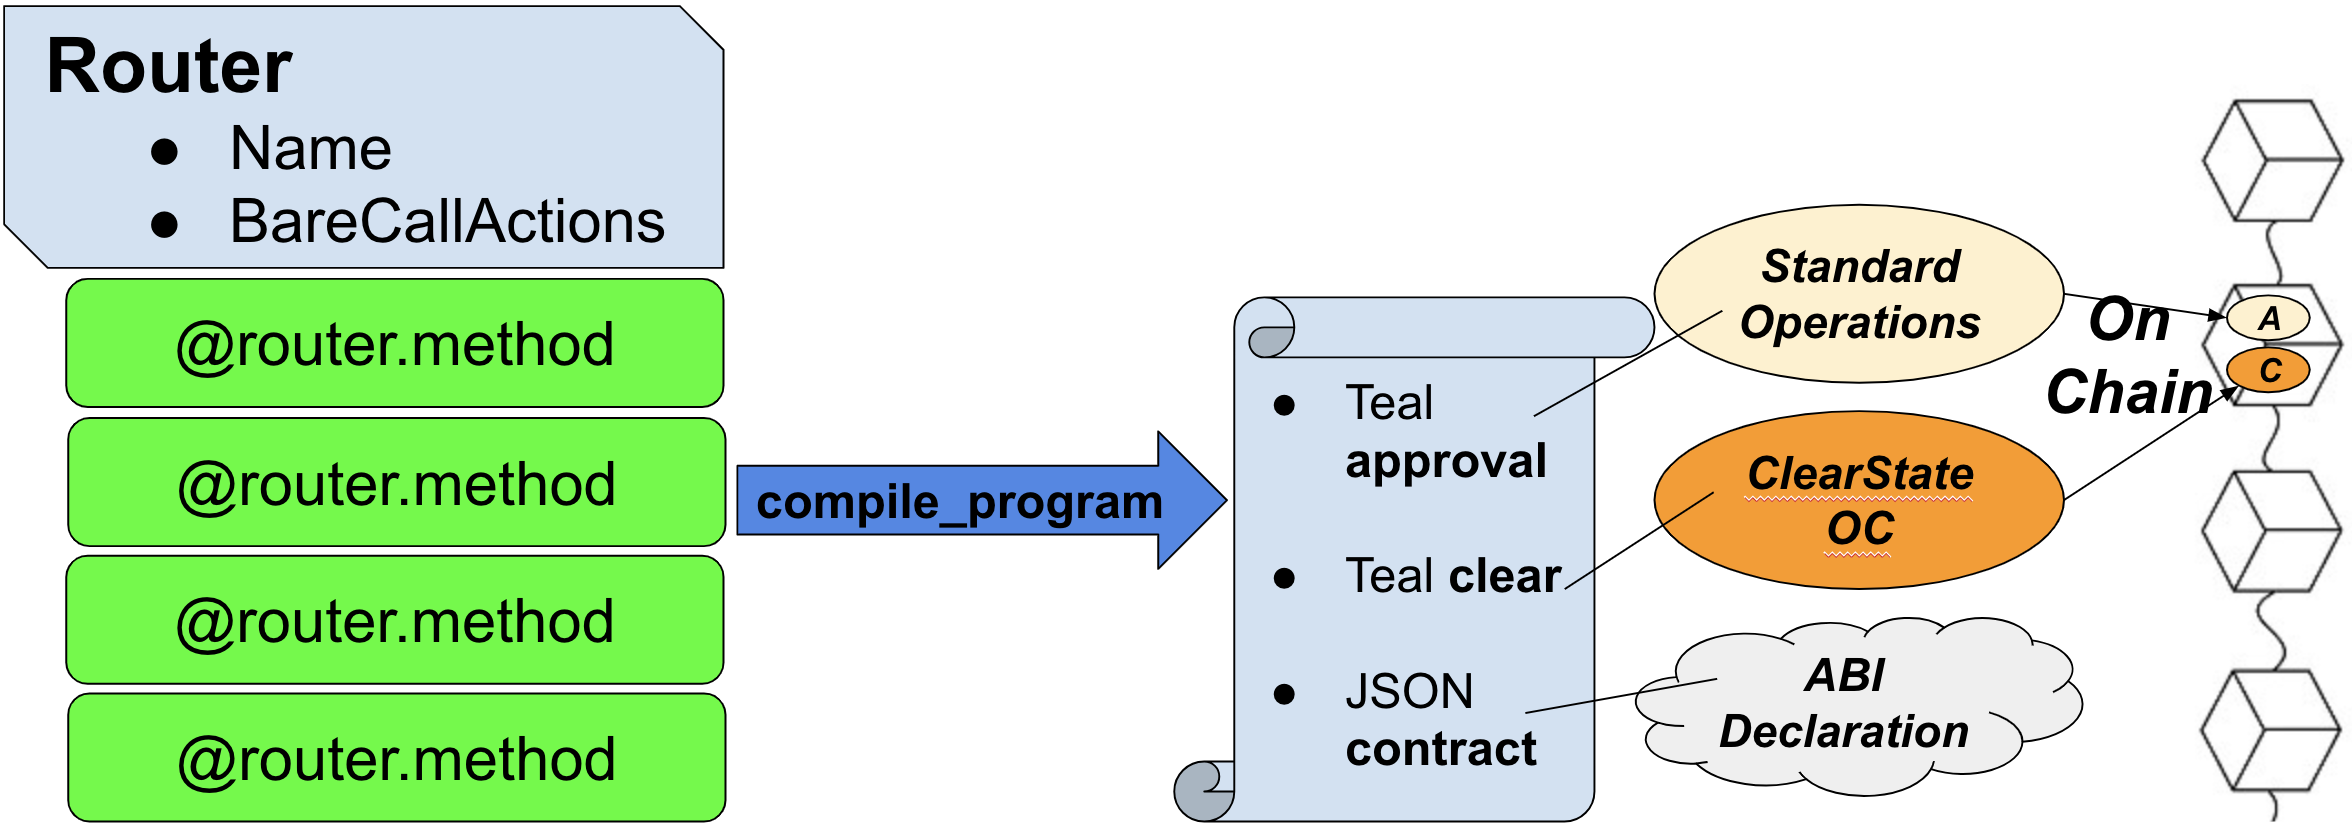



<h1 style='color:white'>.</h1>

### `Router` Initialization

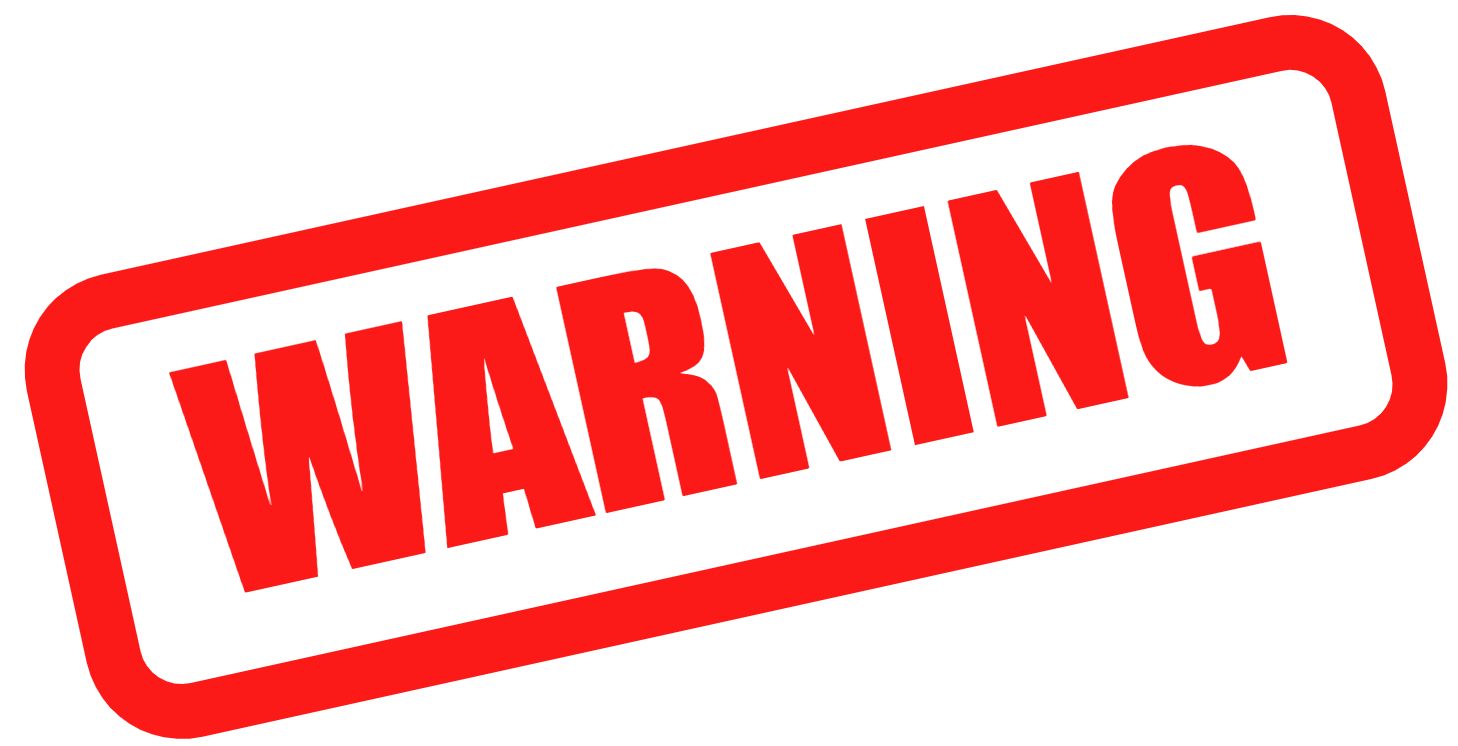

In [9]:
warning()

In [10]:
# WARNING: STUBS ARE FOR ROUTER-ILLUSTRATION PURPOSES ONLY!!!
del_action = OnCompleteAction.call_only(Seq()) 

router = Router(
    name="OpenPollingApp",
    descr="This is a polling application.",
    bare_calls=BareCallActions(delete_application=del_action),
)



<h1 style='color:white'>.</h1>

### Add `methods` with `@router.method` decorator

In [11]:
@router.method
def submit(choice: abi.Uint8) -> Expr:
    """Submit a response to the poll.""" # <-- Docstring
    return Seq()

### ABI provides standard for encoding variety of data types

### `abi.Uint8` - An 8-bit unsigned integer _encoded as big-endian bit sequence_


### There are more: Uint16/32/64, Bool, Byte, String, StaticArray, DynamicArray, Tuple, ...

#### <center>Link: <a href="https://pyteal.readthedocs.io/en/stable/abi.html#definitions">PyTeal ABI Types</a></center>



<h1 style='color:white'>.</h1>

### Compile

In [12]:
opts = OptimizeOptions(scratch_slots=True)
(approval, clear, json_contract) = \
    router.compile_program(version=8, optimize=opts)
# ------------------------------------^^^^^^^^^^^^^



<h1 style='color:white'>.</h1>

### JSON contract

In [13]:
print(json.dumps(json_contract.dictify(), indent=2))

{
  "name": "OpenPollingApp",
  "methods": [
    {
      "name": "submit",
      "args": [
        {
          "type": "uint8",
          "name": "choice"
        }
      ],
      "returns": {
        "type": "void"
      },
      "desc": "Submit a response to the poll."
    }
  ],
  "networks": {},
  "desc": "This is a polling application."
}




<h1 style='color:white'>.</h1>

# Routing Nitty Gritty



<h1 style='color:white'>.</h1>

In [14]:
# print(approval)

In [15]:
%%script false --no-raise-error #pragma version 8
txn NumAppArgs
int 0
==
bnz main_l4
txna ApplicationArgs 0
method "submit(uint8)void"
==
bnz main_l3
err
main_l3:
txn OnCompletion
int NoOp
==
txn ApplicationID
int 0
!=
&&
assert
txna ApplicationArgs 1
int 0
getbyte
callsub submit_0
int 1
return
main_l4:
txn OnCompletion
int DeleteApplication
==
bnz main_l6
err
main_l6:
txn ApplicationID
int 0
!=
assert
int 1
return

// submit
submit_0:
store 0
retsub

### Routing `method` **submit(choice: abi.Uint8)**

In [16]:
show.prepare(approval, (6, 9), (11, 25), (40, 43))

In [17]:
show() # approval

```
txna ApplicationArgs 0
method "submit(uint8)void"
==
bnz main_l3
. . .
main_l3:
txn OnCompletion
int NoOp
==
txn ApplicationID
int 0
!=
&&
assert
txna ApplicationArgs 1
int 0
getbyte
callsub submit_0
int 1
return
. . .
// submit
submit_0:
store 0
retsub
```



<h1 style='color:white'>.</h1>

### Routing `bare call` for **delete**

In [18]:
show.prepare(approval, (2, 5), (26, 30), (32, 38))

In [19]:
show() # approval

```
txn NumAppArgs
int 0
==
bnz main_l4
. . .
main_l4:
txn OnCompletion
int DeleteApplication
==
bnz main_l6
. . .
main_l6:
txn ApplicationID
int 0
!=
assert
int 1
return
```



<h1 style='color:white'>.</h1>

# <center>DEMO</center>